In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.io import loadmat
# some settings

import matplotlib as mpl
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


## k-means clustering

0. Initialize centroids

loop until convergence:
    1. Find closest centroids
    2. Compute centroid means and reassign

In [3]:
data = loadmat('res/ex7data2.mat')

In [4]:
data1= data['X']

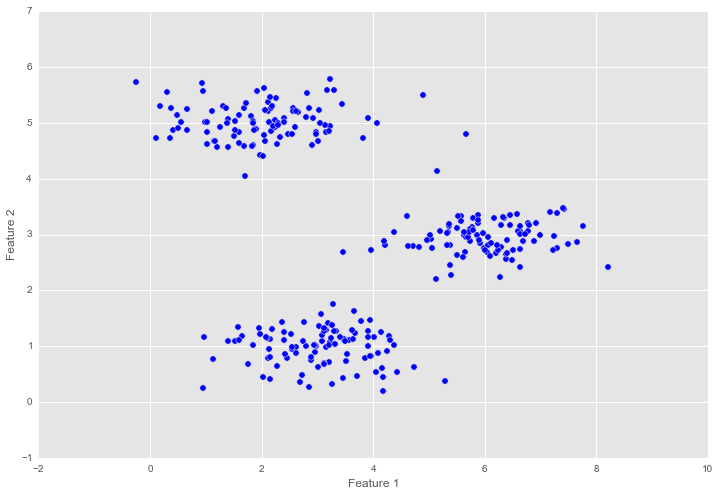

In [72]:
plt.scatter(data1[:,0], data1[:,1],s=40)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [6]:
def kMeansInitCentroids(X,K):
    (m,n) = X.shape
    centroids = np.zeros((K,n))
    # randomly permute
    randidx = np.random.permutation(np.arange(X.shape[0]))
    # select first K
    centroids = X[randidx[0:K], :]  
    return centroids

In [7]:
def findClosestCentroids(X, centroids): 
    m, n = X.shape
    K = centroids.shape[0]
    idx = np.zeros(m)
    dist = np.zeros(K)
    for i in np.arange(m):
        for j in np.arange(K):
            dist[j] = np.sum (np.square(X[i,:]- centroids[j,:]))
        idx[i] = np.argmin(dist)
    return idx

In [47]:
def computeCentroids(X, idx, K):
    (m,n) = X.shape
    centroids = np.zeros((K,n))
    for k in np.arange(K):
        subset = X[idx==k,:]
        centroids[k,:] = np.sum(subset,axis=0)/ subset.shape[0] 
    return centroids

In [48]:
def runKmeans(X, initial_centroids, max_iters):
    (m,n) = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    for i in np.arange(max_iters):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

In [49]:
X = np.c_[data1[:,0],data1[:,1]]

In [50]:
initial_centroids = kMeansInitCentroids(X, 3)

In [56]:
centroids, idx = runKmeans(X, initial_centroids, max_iters = 100)

In [73]:
print centroids
print idx

[[ 3.04367119  1.01541041]
 [ 6.03366736  3.00052511]
 [ 1.95399466  5.02557006]]
[ 2.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  

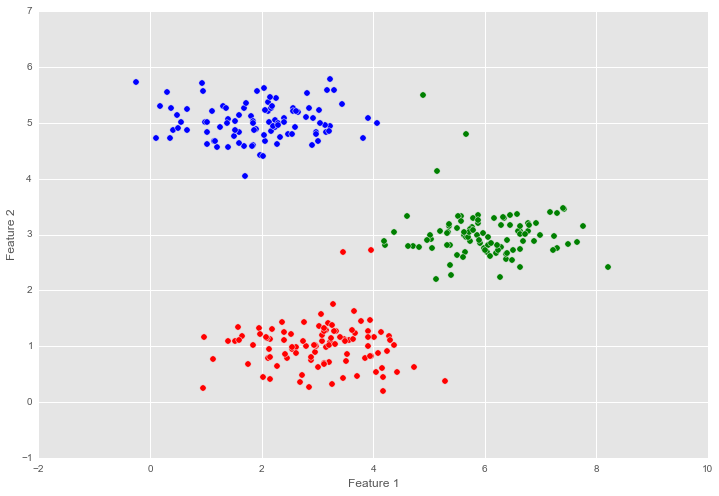

In [71]:
plt.scatter(X[:,0][idx==1],X[:,1][idx==1], c= 'g',s=40)
plt.scatter(X[:,0][idx==0],X[:,1][idx==0], c= 'r',s=40)
plt.scatter(X[:,0][idx==2],X[:,1][idx==2], c= 'b',s=40)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')